In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

from sklearn.linear_model import LinearRegression

In [2]:
df_20 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/WrStats2020.csv")
df_21 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/WrStats2021.csv")

In [3]:
df_20 = df_20[df_20.G >= 12].reset_index(drop=True)
df_20.head()

,RANK,PLAYER,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1,Davante Adams (LV),115,149,"1,374",11.9,56,0,18,0,0,0,1,14,243.4,17.4,99.9%
1,2,Tyreek Hill (MIA),87,135,"1,276",14.7,75,0,15,13,123,2,0,15,241.9,16.1,99.9%
2,3,Stefon Diggs (BUF),127,166,"1,535",12.1,55,0,8,1,1,0,0,16,201.6,12.6,99.9%
3,4,Calvin Ridley (ATL),90,143,"1,374",15.3,63,0,9,5,1,0,1,15,191.5,12.8,3.4%
4,5,DK Metcalf (SEA),83,129,"1,303",15.7,62,0,10,0,0,0,1,16,188.3,11.8,97.3%


In [4]:
df_21 = df_21[df_21.G >=12].reset_index(drop=True)
df_21.head()

,RANK,PLAYER,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1,Cooper Kupp (LAR),145,191,"1,947",13.4,59,0,16,4,18,0,0,17,294.5,17.3,100.0%
1,2,Deebo Samuel (SF),77,121,"1,405",18.2,83,0,6,59,365,8,2,16,262.0,16.4,99.9%
2,3,Ja'Marr Chase (CIN),81,128,"1,455",18.0,82,0,13,7,21,0,1,17,223.6,13.2,99.9%
3,4,Justin Jefferson (MIN),108,167,"1,616",15.0,56,0,10,6,14,0,1,17,222.4,13.1,99.9%
4,5,Davante Adams (LV),123,169,"1,553",12.6,59,0,11,0,0,0,0,16,221.3,13.8,99.9%


In [5]:
df_20.loc[0:50, 'FPTS/G'].corr(df_21.loc[0:50, 'FPTS/G'])

0.9129176483827264

In [6]:
x = df_20['FPTS/G'][0:50].values.reshape(-1,1)

y = df_21['FPTS/G'][0:50].values.reshape(-1,1)

reg = LinearRegression().fit(x,y)
reg.score(x,y)

0.8410136205271901

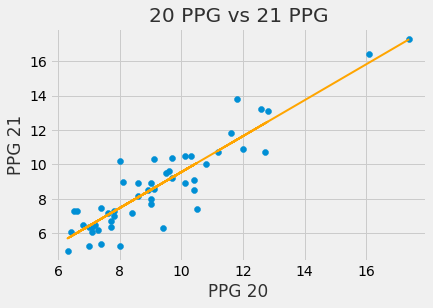

In [8]:
plt.figure()

plt.scatter(x=df_20.loc[0:50,'FPTS/G'], y = df_21.loc[0:50, 'FPTS/G'])

yhat = reg.coef_ * x + reg.intercept_
plt.plot(x, yhat, lw=2, c='orange')

plt.xlabel('PPG 20', alpha = .8)
plt.ylabel('PPG 21', alpha=0.8)
plt.title('20 PPG vs 21 PPG', alpha = 0.8)
plt.style.use('fivethirtyeight')


plt.show()

In [9]:
def predict_ppg(x):
    score = np.array([[x]])
    prediction = reg.predict(score)
    
    return prediction[0,0]


In [23]:
df_21 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/WrStats2021.csv")

In [24]:
df_22 = df_21.copy()
df_22 = df_22[['PLAYER', 'FPTS/G']]
df_22['FPTS/G 22'] = 0
df_22.head()

,PLAYER,FPTS/G,FPTS/G 22
0,Cooper Kupp (LAR),17.3,0
1,Deebo Samuel (SF),16.4,0
2,Ja'Marr Chase (CIN),13.2,0
3,Justin Jefferson (MIN),13.1,0
4,Davante Adams (LV),13.8,0


In [25]:
df_22['FPTS/G 22'] = df_22.apply(lambda x: predict_ppg(x['FPTS/G']), axis = 1)
df_22['FPTS 22'] = np.round(df_22['FPTS/G 22'] * 17,2)
df_22.sort_values('FPTS 22', ascending=False, inplace=True)
df_22.reset_index(drop = True, inplace = True)
df_22.index = df_22.index + 1
df_22.head()

,PLAYER,FPTS/G,FPTS/G 22,FPTS 22
1,Cooper Kupp (LAR),17.3,17.161247,291.74
2,Deebo Samuel (SF),16.4,16.224597,275.82
3,Davante Adams (LV),13.8,13.518718,229.82
4,Ja'Marr Chase (CIN),13.2,12.894284,219.20
5,Justin Jefferson (MIN),13.1,12.790212,217.43


In [26]:
df_22.to_csv('wr_rankings.csv')